# Control Tutorial_1
_Reference :_ [Electrical installation & energy efficiency
Electrical engineering Community](http://engineering.electrical-equipment.org/panel-building/introduction-to-second-order-systems.html), [First Order System Types from Control Labraory](http://engineering.ju.edu.jo/Laboratories/04%20-%20First%20Order%20System.pdf)

# First order systems
---

The standard transfer function of first order system is given by:
$$
G(s) = \frac{Y(s)}{X(s)} = \frac{K}{Ts+1}
$$
Where, $K$ is the system gain, $T$ is the time constant for a first order system.

### Example for first order systems (RC circuit)

<img src="figures/RC.png" hight="150">

Where, $R$ is the resistance of the resistor, $C$ is the capacitance of the capacitor, $x(t) \rm{[V]}$ is Input, $y(t)\rm{[V]}$ is Output, and $i(t)\rm{[A]}$ is the electric current at $t$.  
The relationship between current $i(t)$ and output $y(t)$ is given as  
$$
i(t) = C \dot{y}(t)
$$
So, this system is represented as the differential equation below:  
$$
CR\dot{y}(t) + y(t) = x(t)
$$

This results in the following equation in the Laplace domain:    
$$
CR\{sY(s)-y(0)\} + Y(s) = X(s)
$$

We assuming $y(0)$ to be zero when we consider transfer function. So, the transfer function of the RC circuit is given as:

$$
G(s) = \frac{Y(s)}{X(s)} = \frac{1}{CRs+1} 
$$

In this case, the DC gain $K =1$, the time constant $T$ is represented as $T = CR$

# Simulation

In [1]:
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interactive
%matplotlib inline

We can declare the continuous-time linear time invariant system using the "`scipy.signal.lti`" method.

In [2]:
def First_sys(K,T):
    num = [K] 
    den = [T, 1] 
    return signal.lti(num, den)

### 1. Impulse response

The unit impulse input is given by:

$$
  x(t) = \delta(t) = \left\{ \begin{array}{ll}
    \infty & (t=0) \\
    0 & (otherwise)
  \end{array} \right.
$$

The transfer function of the input in the Laplace domain is $X(s)=1$. So the output transform will be

$$
Y(s) = \frac{K}{Ts+1}
$$

By taking inverse Laplace transform, we get

$$
y(t) = \frac{K}{T} \rm{e}^{-\frac{t}{T}}
$$

We can simulate the impulse response of the system in Python using "`scipy.signal.impulse`" method.  
More information: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html#scipy.signal.impulse

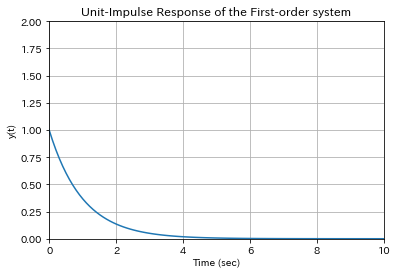

In [3]:
def First_Impulse(K = 1,T = 1):
    G = First_sys(K,T)
    horizon = np.linspace(0, 10, 100)
    t, y = signal.impulse(G, T=horizon)
    plt.plot(t,y)
    plt.title("Unit-Impulse Response of the First-order system")
    plt.ylabel("y(t)")
    plt.xlabel("Time (sec)")
    plt.xlim(0, 10)
    plt.ylim(0, 2)
    plt.grid(True)
    plt.show()

interactive_plot = interactive(First_Impulse, K=(0.1 , 2 ,0.1) ,T=(0.1, 2, 0.1))
output = interactive_plot.children[-1]
output.layout.width = '600px'
interactive_plot

### 2. Step response

The transfer function of input is given by:

$$
X(s) = \frac{1}{s}
$$

Therefore the unit step response is:

$$
Y(s) = \frac{K}{s(Ts+1)}
$$

By taking inverse laplace transform, we get

$$
y(t) = K - e^{-\frac{t}{T}}
$$

We can simulate the step response of the system in Python using "`scipy.signal.step`" method.  
More information : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step.html

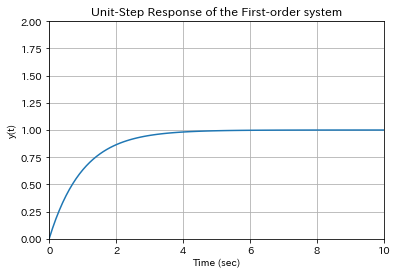

In [4]:
def First_Step(K = 1,T = 1):
    G = First_sys(K,T)
    horizon = np.linspace(0, 10, 100)
    t, y = signal.step(G, T=horizon)
    plt.plot(t,y)
    plt.title("Unit-Step Response of the First-order system")
    plt.ylabel("y(t)")
    plt.xlabel("Time (sec)")
    plt.xlim(0, 10)
    plt.ylim(0, 2)
    plt.grid(True)
    plt.show()

interactive_plot = interactive(First_Step, K=(0.1 , 2 ,0.1) ,T=(0.1, 2, 0.1))
output = interactive_plot.children[-1]
output.layout.width = '600px'
interactive_plot